# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
#Random 10 samples from the dataset
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
267,4403000,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
255,4480000,5885,2,1,1,yes,no,no,no,yes,1,no,unfurnished
220,4795000,8100,4,1,4,yes,no,yes,no,yes,2,no,semi-furnished
143,5600000,4800,5,2,3,no,no,yes,yes,no,0,no,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
75,6650000,4260,4,2,2,yes,no,no,yes,no,0,no,semi-furnished
335,3920000,3816,2,1,1,yes,no,yes,no,yes,2,no,furnished
179,5215000,3180,3,2,2,yes,no,no,no,no,2,no,semi-furnished
114,6020000,6800,2,1,1,yes,yes,yes,no,no,2,no,furnished


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Data shape
df.shape

(545, 13)

In [6]:
# Data status
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# Correlation between data
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [10]:
data = df.copy()

# Data Visulization

Bar Plot

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

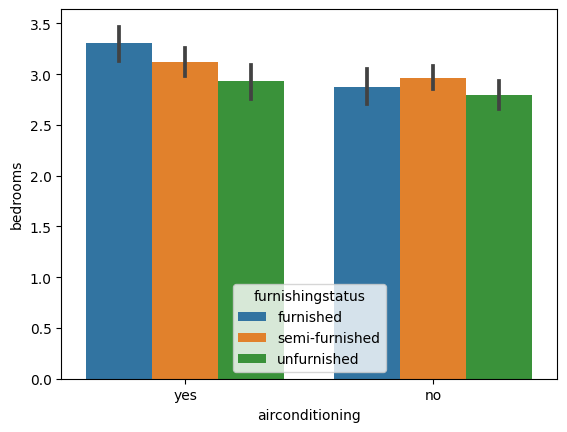

In [11]:
sns.barplot(x=df['airconditioning'], y=df['bedrooms'], hue=df['furnishingstatus'])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

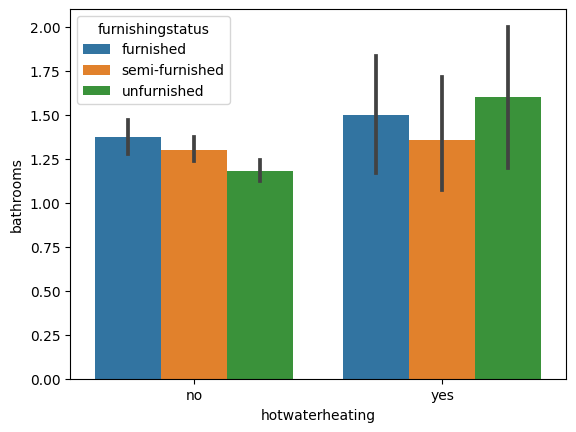

In [12]:
sns.barplot(x=df['hotwaterheating'], y=df['bathrooms'], hue=df['furnishingstatus'])

Box Plot

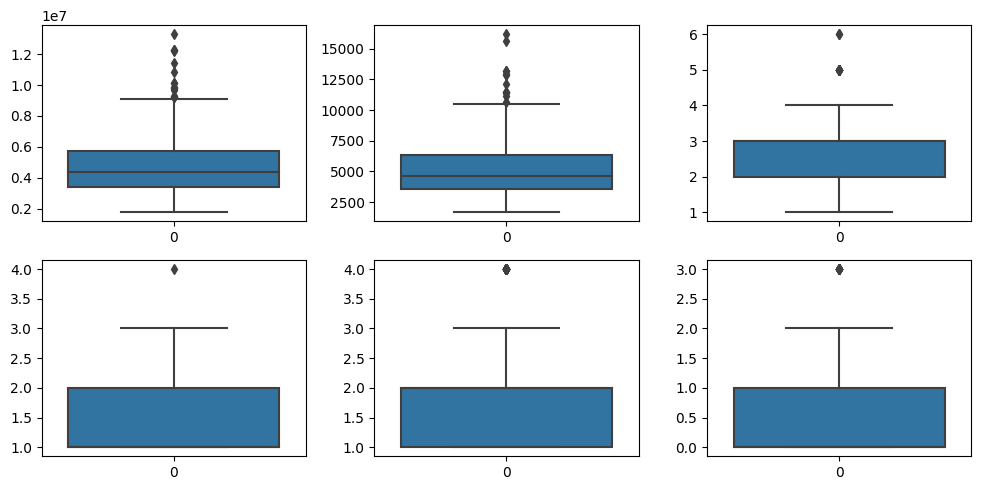

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x2044d459c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2044b0edf50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2044d459390>],
 'medians': [<matplotlib.lines.Line2D at 0x2044d45bed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2044d468790>],
 'means': []}

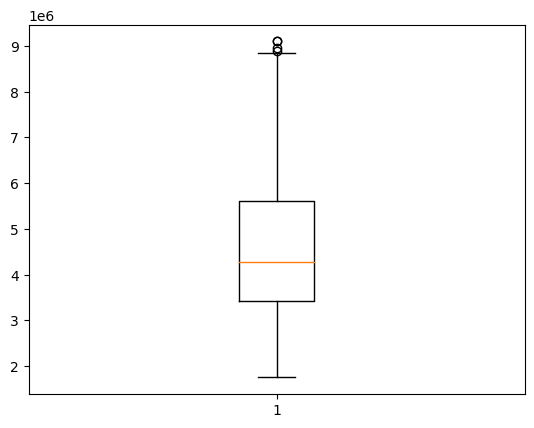

In [14]:
#Dealing with outliers in price

Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >=Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x2044d434c10>,
 'caps': [<matplotlib.lines.Line2D at 0x2044d4ce7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2044d4ccf50>],
 'medians': [<matplotlib.lines.Line2D at 0x2044d4cf890>],
 'fliers': [<matplotlib.lines.Line2D at 0x2044d4d8050>],
 'means': []}

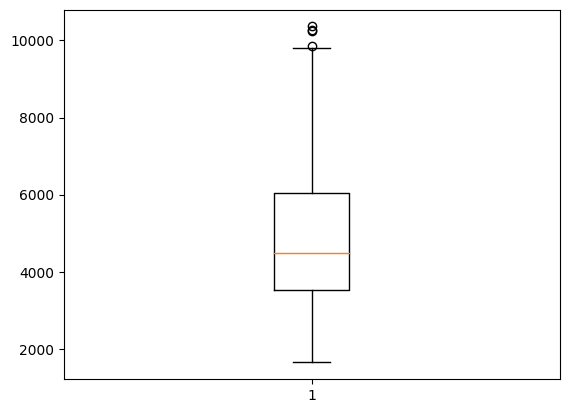

In [15]:
# Dealing with outliers in area

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

plt.boxplot(df.area)

<Axes: xlabel='furnishingstatus', ylabel='price'>

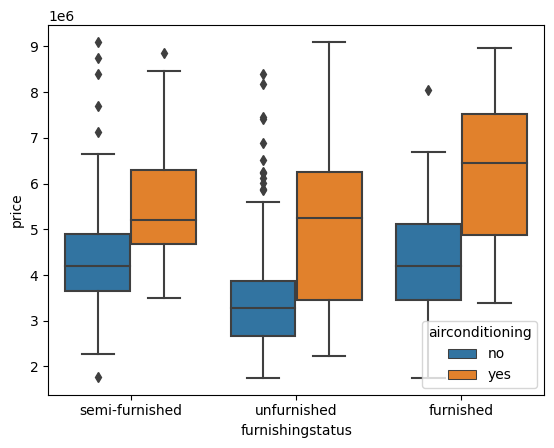

In [16]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

Distplot

<Axes: xlabel='bedrooms', ylabel='Density'>

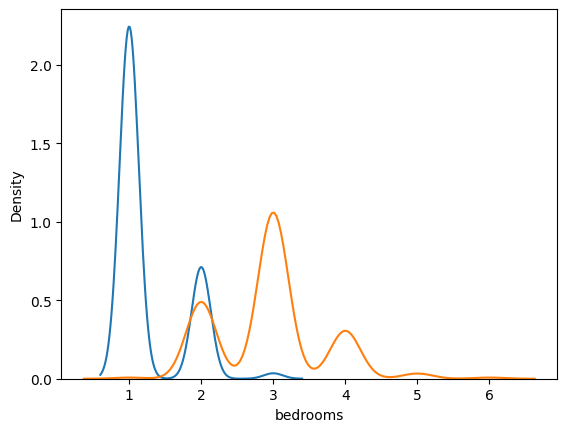

In [17]:
sns.distplot(df['bathrooms'], hist=False)
sns.distplot(df['bedrooms'], hist=False)

<Axes: xlabel='parking', ylabel='Density'>

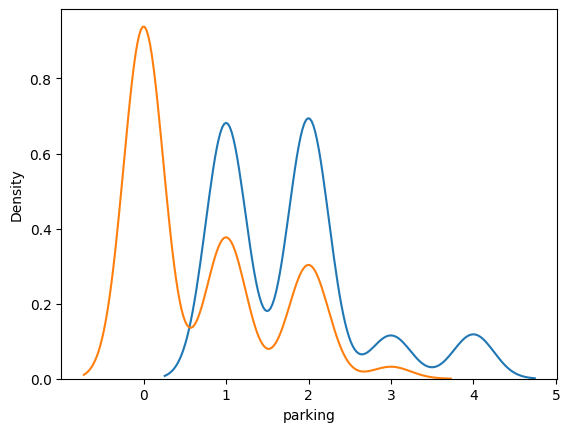

In [18]:
sns.distplot(df['stories'], hist=False)
sns.distplot(df['parking'], hist=False)

Heatmap

<Axes: >

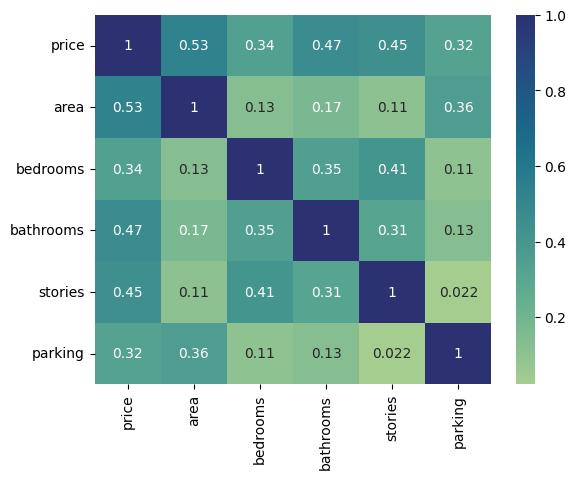

In [19]:
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True)

Scatter Plot

<Axes: xlabel='area', ylabel='price'>

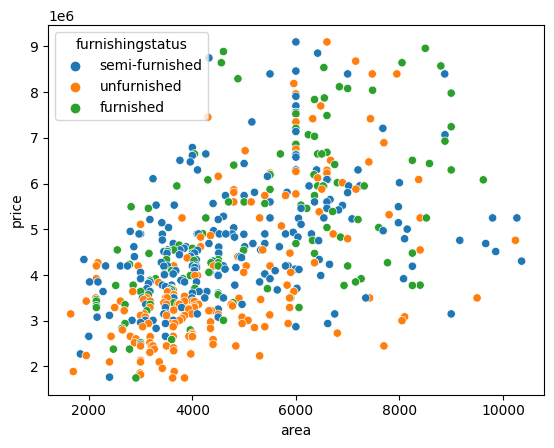

In [20]:
sns.scatterplot(y = df['price'], x = df['area'], hue = df['furnishingstatus'])

Pair Plot

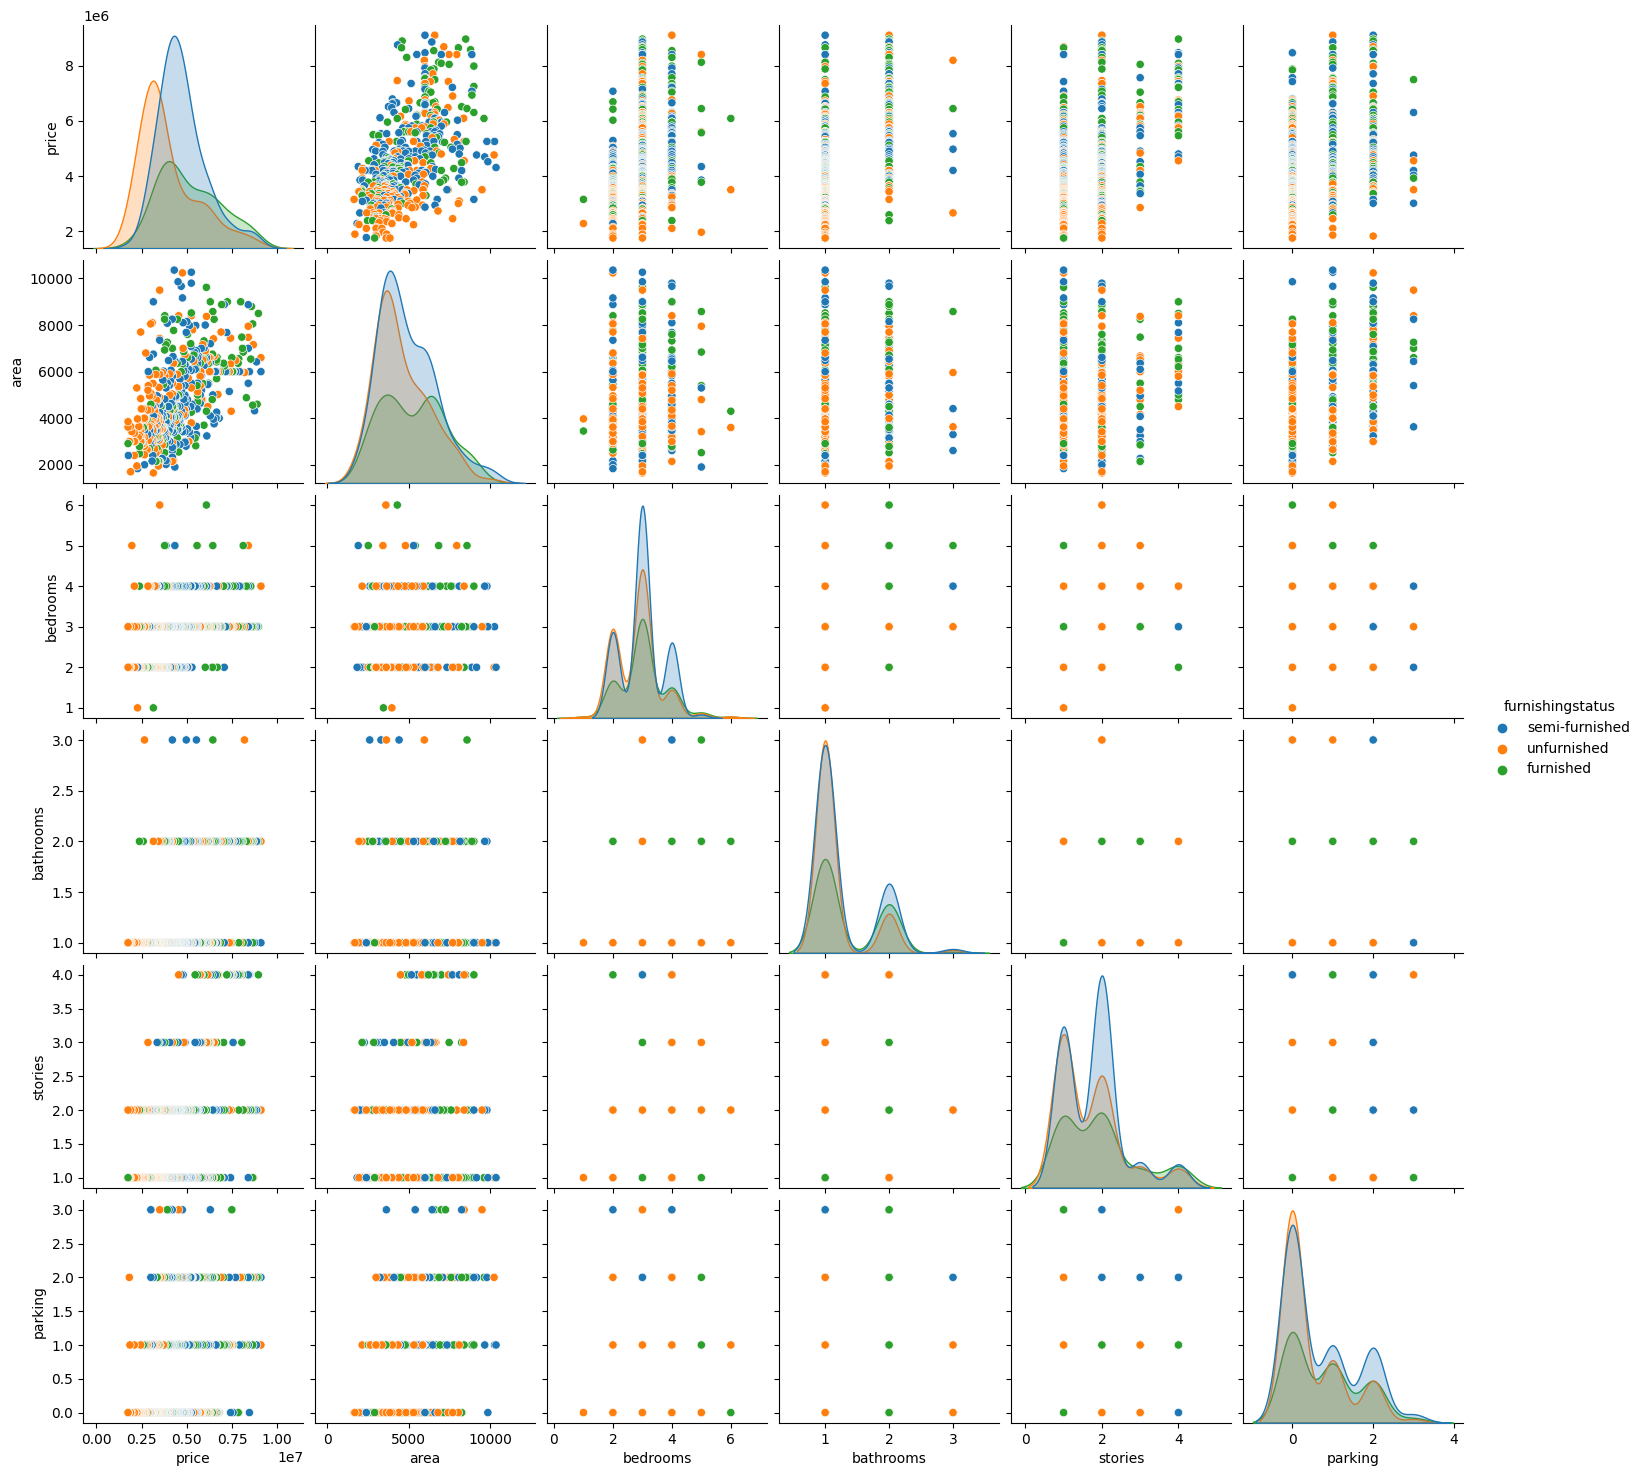

In [21]:
sns.pairplot(df, hue = 'furnishingstatus')

# Feature Engineering

In [22]:
status = pd.get_dummies(data[['furnishingstatus','mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']], drop_first=True)

data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,False,False,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,False,False,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,True,False,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,False,False,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,False,False,True,True,True,False,True,False


# Train Test Split

In [23]:
X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Training

In [25]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(),
    'XGRF Regressor' : xgb.XGBRFRegressor(),
    'Support Vector Regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
    'LGBM Regressor' : LGBMRegressor(),
    'Cat Boost' : CatBoostRegressor()
}

In [26]:
pred = {}

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name] = y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 13
[LightGBM] [Info] Start training from score 4706527.385321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

# Models Evaluation

Results for Random Forest Regressor : 
Mean Square Error : 1968251157853.305
R2 Score : 0.6105997024631666


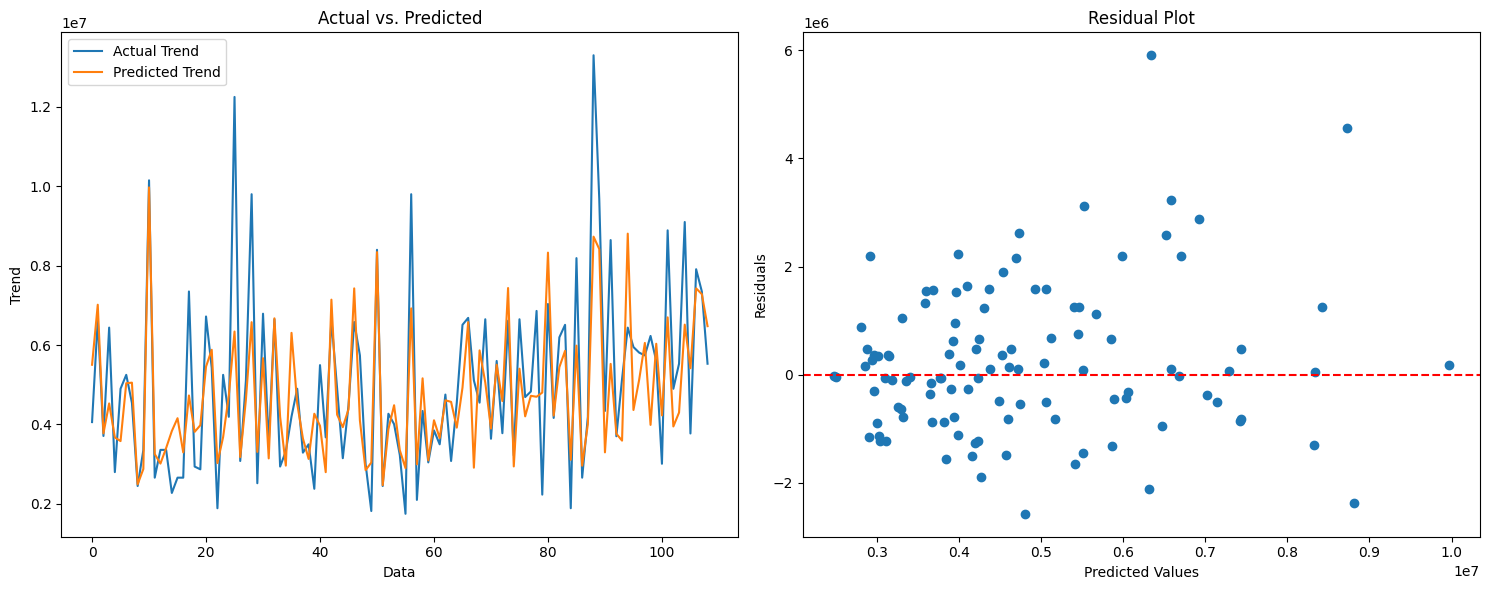

Results for Gradient Boosting Regressor : 
Mean Square Error : 1690460287319.3242
R2 Score : 0.665558058365737


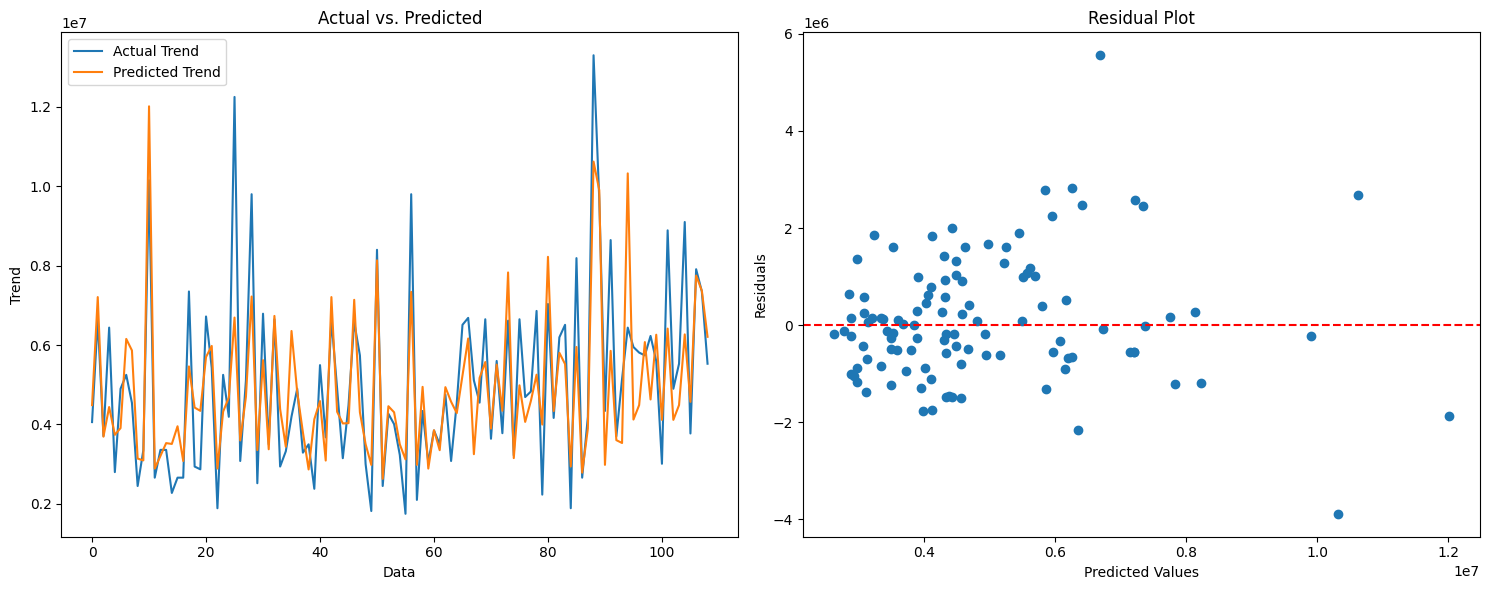

Results for XGBoost : 
Mean Square Error : 1897955620388.2397
R2 Score : 0.624507024755441


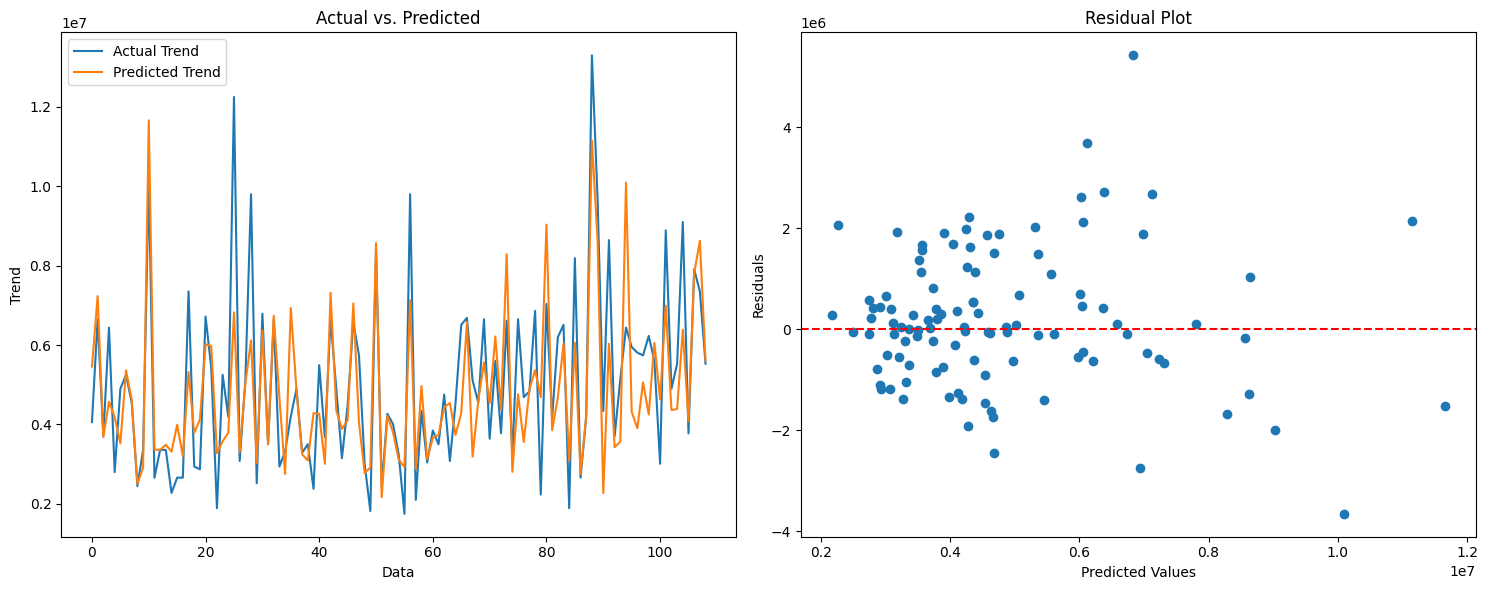

Results for XGRF Regressor : 
Mean Square Error : 2154262060366.8618
R2 Score : 0.5737991648412946


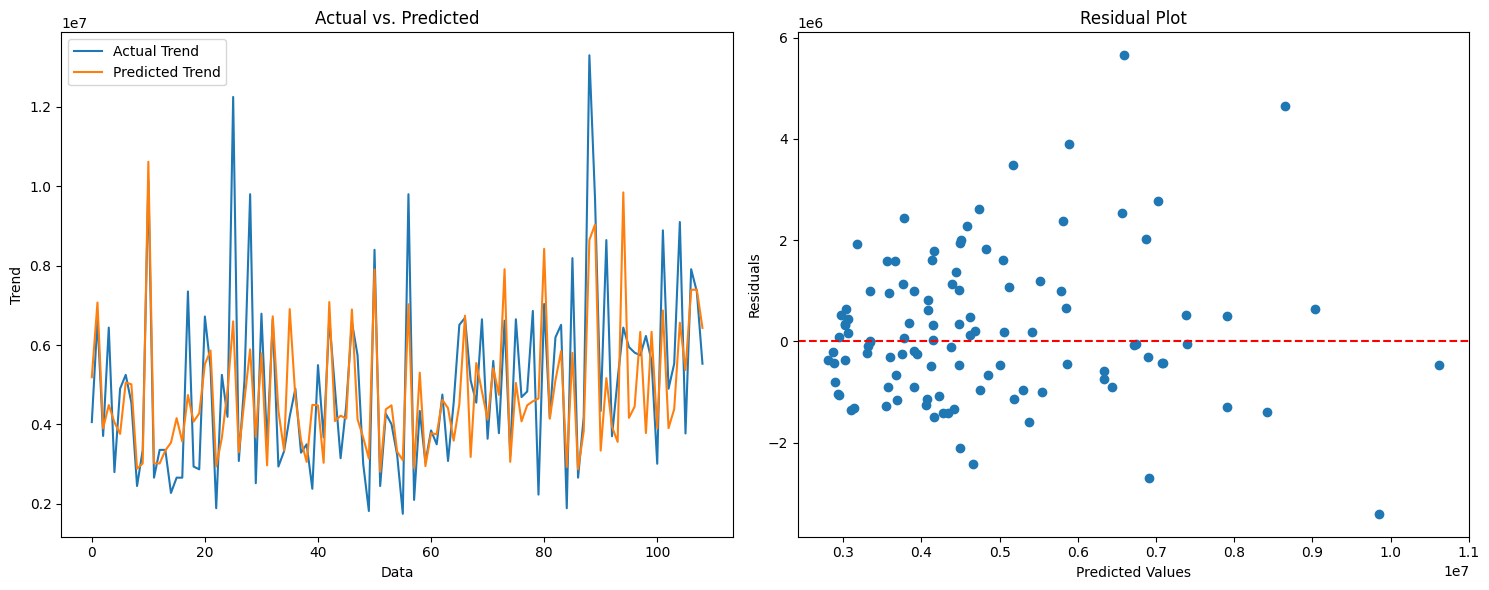

Results for Support Vector Regressor : 
Mean Square Error : 5567932366409.783
R2 Score : -0.10156395005485774


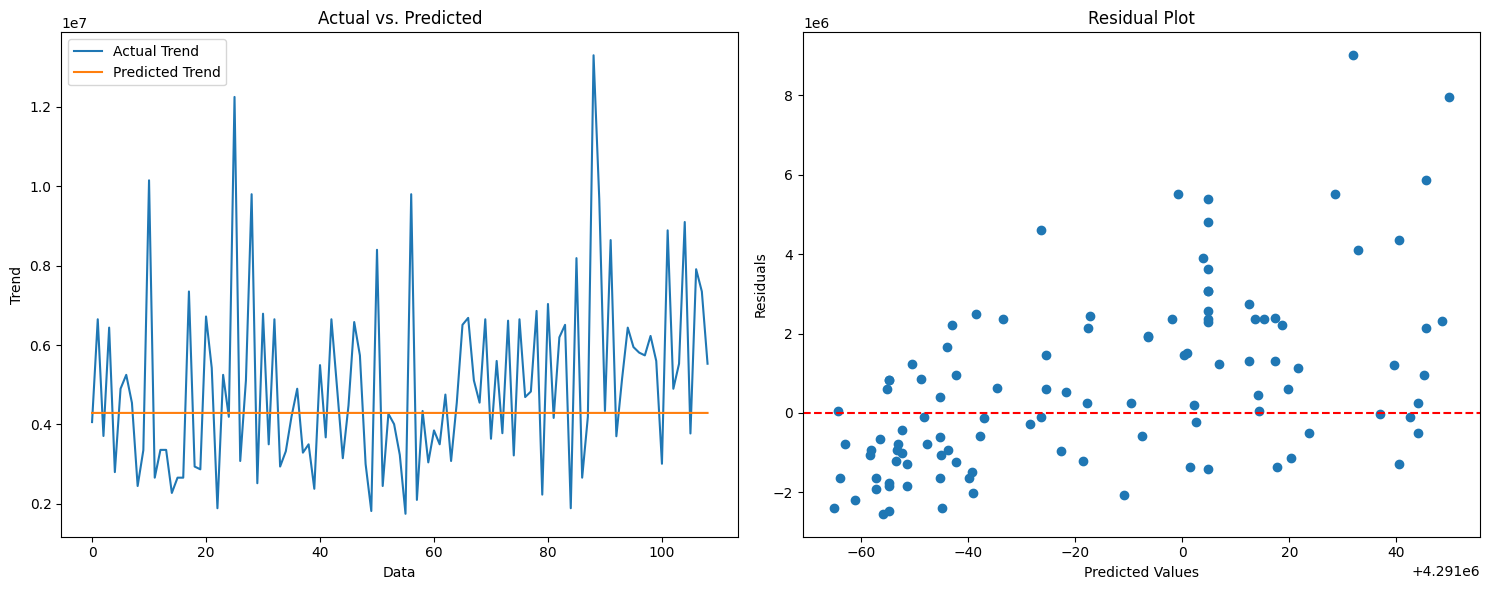

Results for Lasso Reg : 
Mean Square Error : 1754321266292.506
R2 Score : 0.6529237539915572


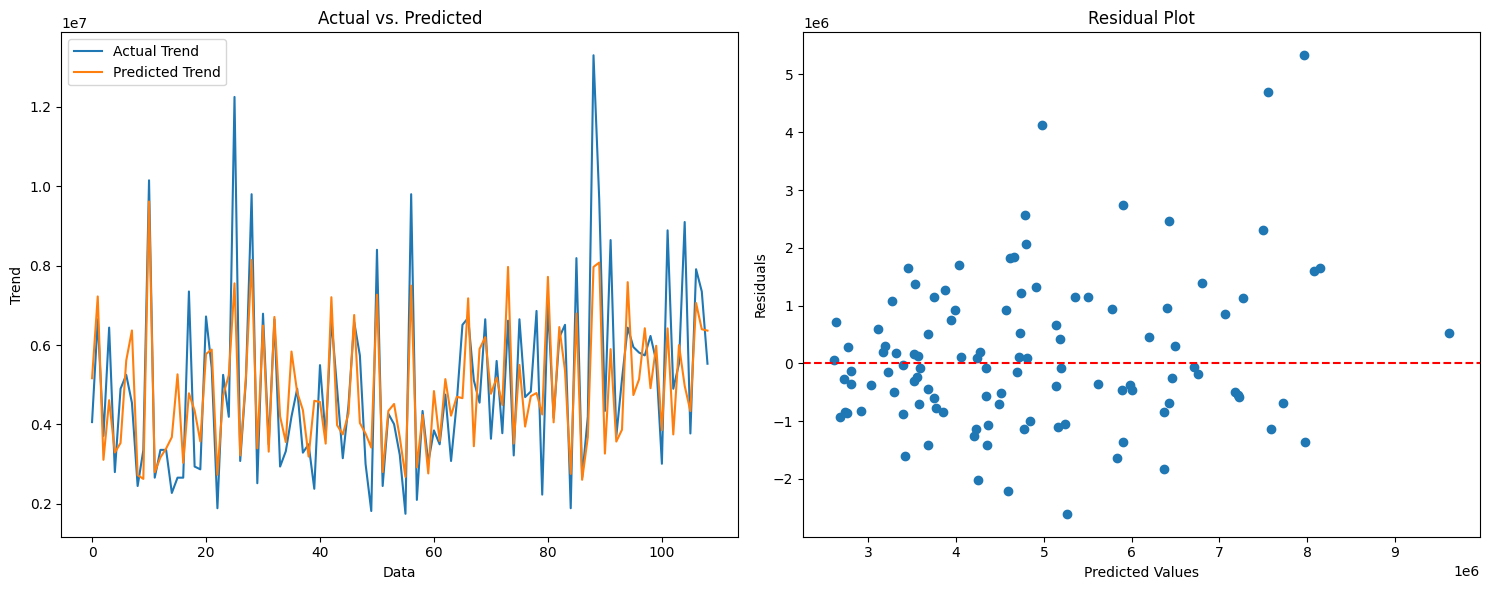

Results for Ridge Reg : 
Mean Square Error : 1756474279575.2847
R2 Score : 0.652497800215501


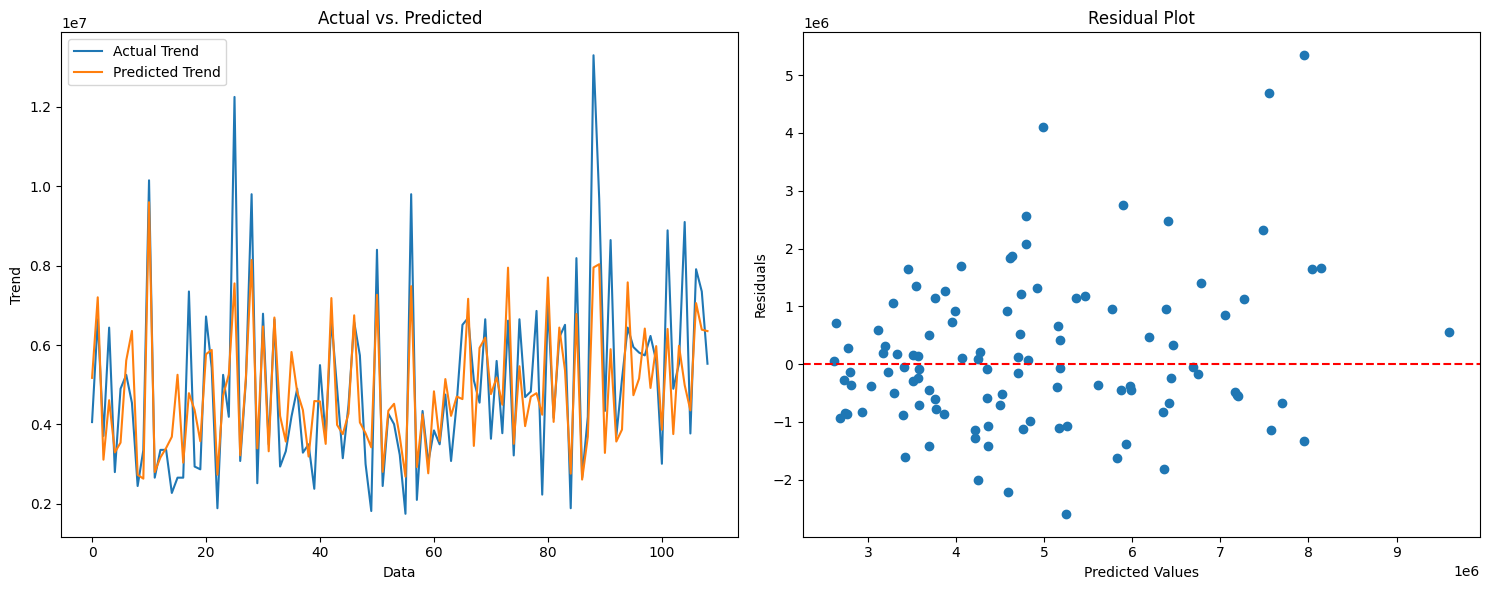

Results for LGBM Regressor : 
Mean Square Error : 1980633858666.3833
R2 Score : 0.6081498995700332


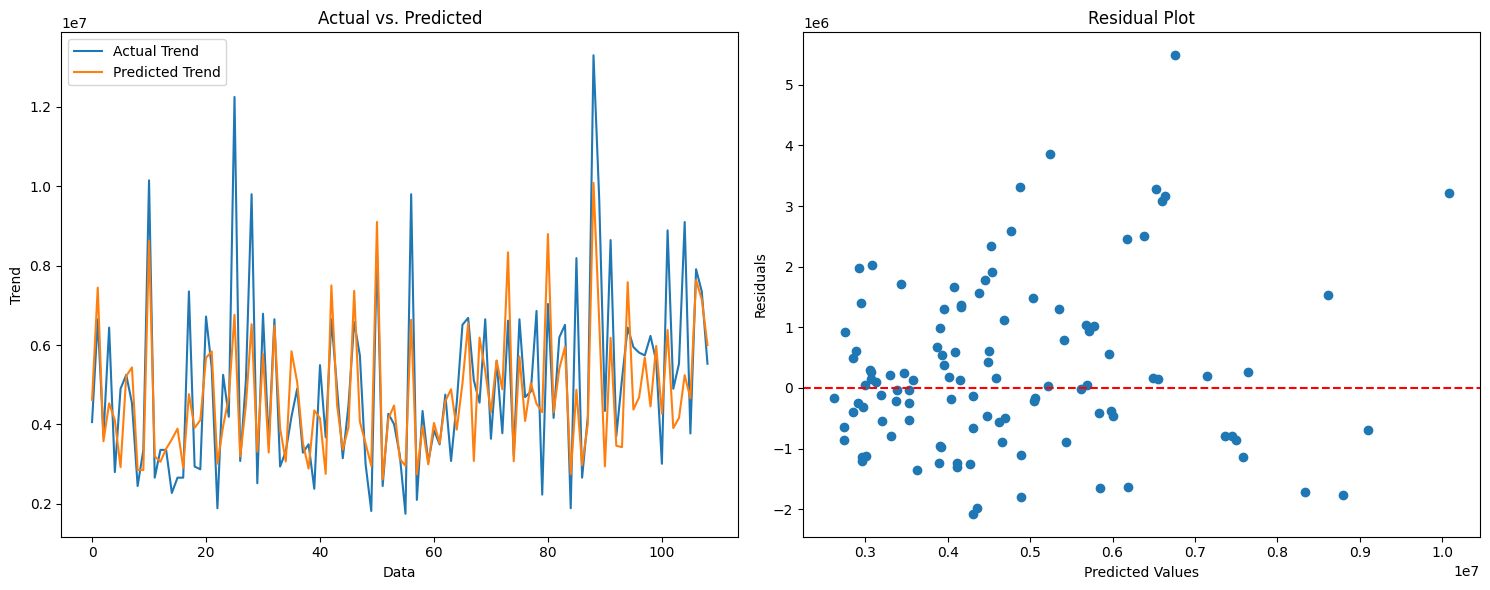

Results for Cat Boost : 
Mean Square Error : 1849833962989.1082
R2 Score : 0.6340274498467311


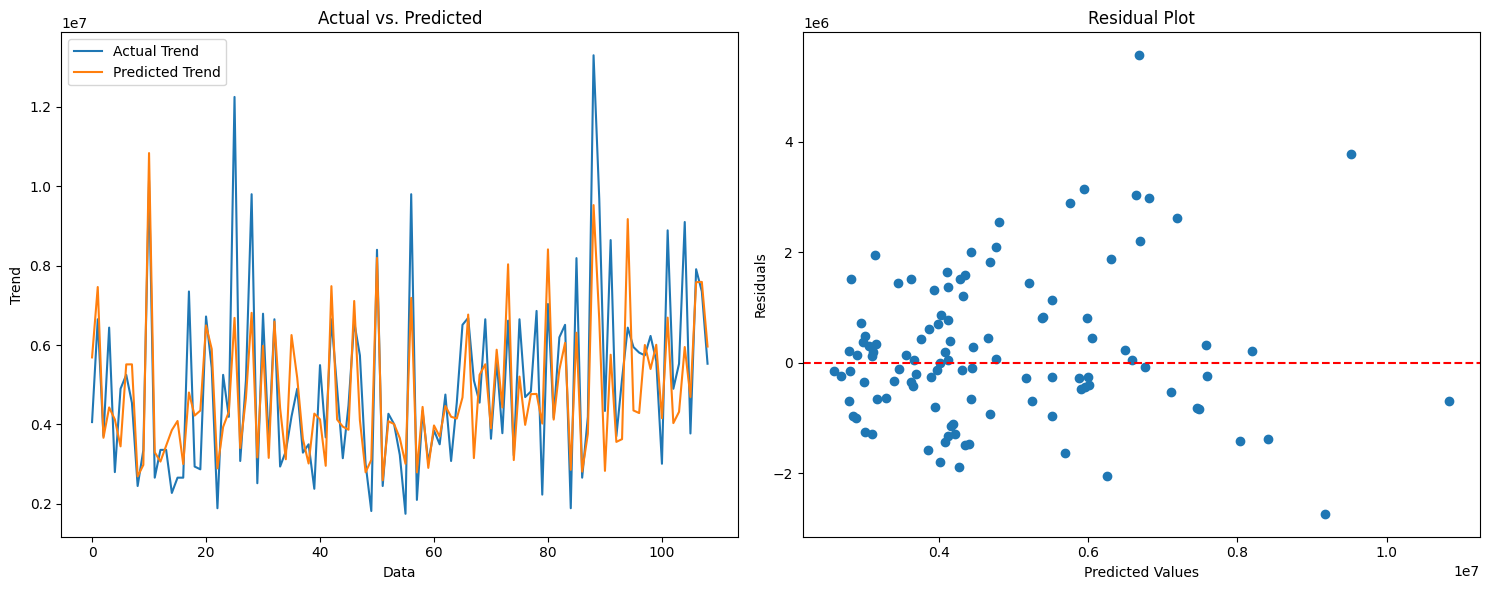

In [27]:
acc = {}

for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print(f"Mean Square Error : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))
    
    # Plotting the actual vs predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label = 'Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label = 'Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')
    
    # Plot Residuals
    residuals = y_test - y_pred
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y = 0, color = 'r', linestyle = '--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    
    plt.tight_layout()
    plt.show() 

# Accuracy

In [28]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data

,Accuracy
Random Forest Regressor,0.610600
Gradient Boosting Regressor,0.665558
XGBoost,0.624507
XGRF Regressor,0.573799
Support Vector Regressor,-0.101564
Lasso Reg,0.652924
Ridge Reg,0.652498
LGBM Regressor,0.608150
Cat Boost,0.634027
